## Loading Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
data = pd.read_csv("train (1).csv")

# Data Preprocessing

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data1 = data.copy()
data1.set_index("PassengerId",inplace=True)

In [5]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking null values

In [6]:
data1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data1.size

9801

In [9]:
row,col = data1.shape
print(f"Rows:{row} \nColumns: {col}")

Rows:891 
Columns: 11


## Descriptive Statistics

In [10]:
describe = data1.describe(include="all").fillna("-")
describe

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891,891,714.0,891.0,891.0,891,891.0,204,889
unique,-,-,891,2,-,-,-,681,-,147,3
top,-,-,"Braund, Mr. Owen Harris",male,-,-,-,347082,-,B96 B98,S
freq,-,-,1,577,-,-,-,7,-,4,644
mean,0.383838,2.308642,-,-,29.699118,0.523008,0.381594,-,32.204208,-,-
std,0.486592,0.836071,-,-,14.526497,1.102743,0.806057,-,49.693429,-,-
min,0.0,1.0,-,-,0.42,0.0,0.0,-,0.0,-,-
25%,0.0,2.0,-,-,20.125,0.0,0.0,-,7.9104,-,-
50%,0.0,3.0,-,-,28.0,0.0,0.0,-,14.4542,-,-
75%,1.0,3.0,-,-,38.0,1.0,0.0,-,31.0,-,-


## Encoding categorical columns

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data1["Sex"] = le.fit_transform(data1.Sex)
data1["Embarked"] = le.fit_transform(data1.Embarked)

## Creating new column

In [13]:
data1["Family_size"] = data1.Parch + data1.SibSp + 1

## removing columns which are not important

In [14]:
data1.drop(columns=["Name","Cabin","Ticket","SibSp","Parch"],inplace=True)
data1["Fare"] = round(data1.Fare,2)

In [15]:
data1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
PassengerId,,,,,,,
1,0,3,1,22.0,7.25,2,2
2,1,1,0,38.0,71.28,0,2
3,1,3,0,26.0,7.92,2,1
4,1,1,0,35.0,53.10,2,2
5,0,3,1,35.0,8.05,2,1


## Missing value treatment

In [16]:
data1["Age"] = data1.Age.fillna(data1.Age.mean())
data1.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

## Visualizing  numeric columns

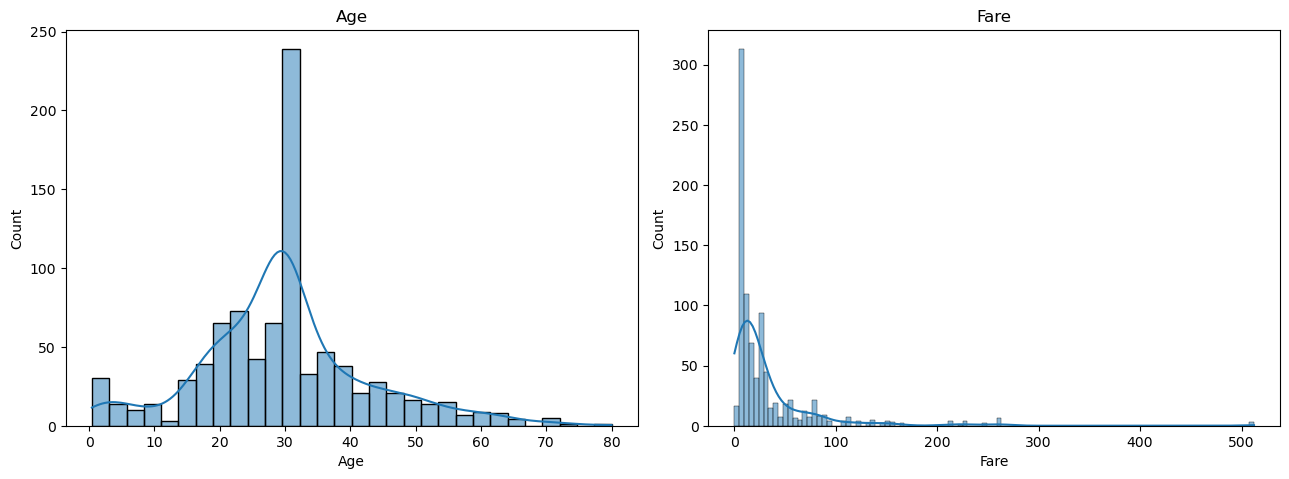

In [17]:
num = data1[["Age","Fare"]]
plt.figure(figsize=(13,9))
for i,j in enumerate(num.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(num[j],kde=True)
    plt.title(j)

plt.tight_layout()
plt.show()
    

##  Visualizing  categorical columns

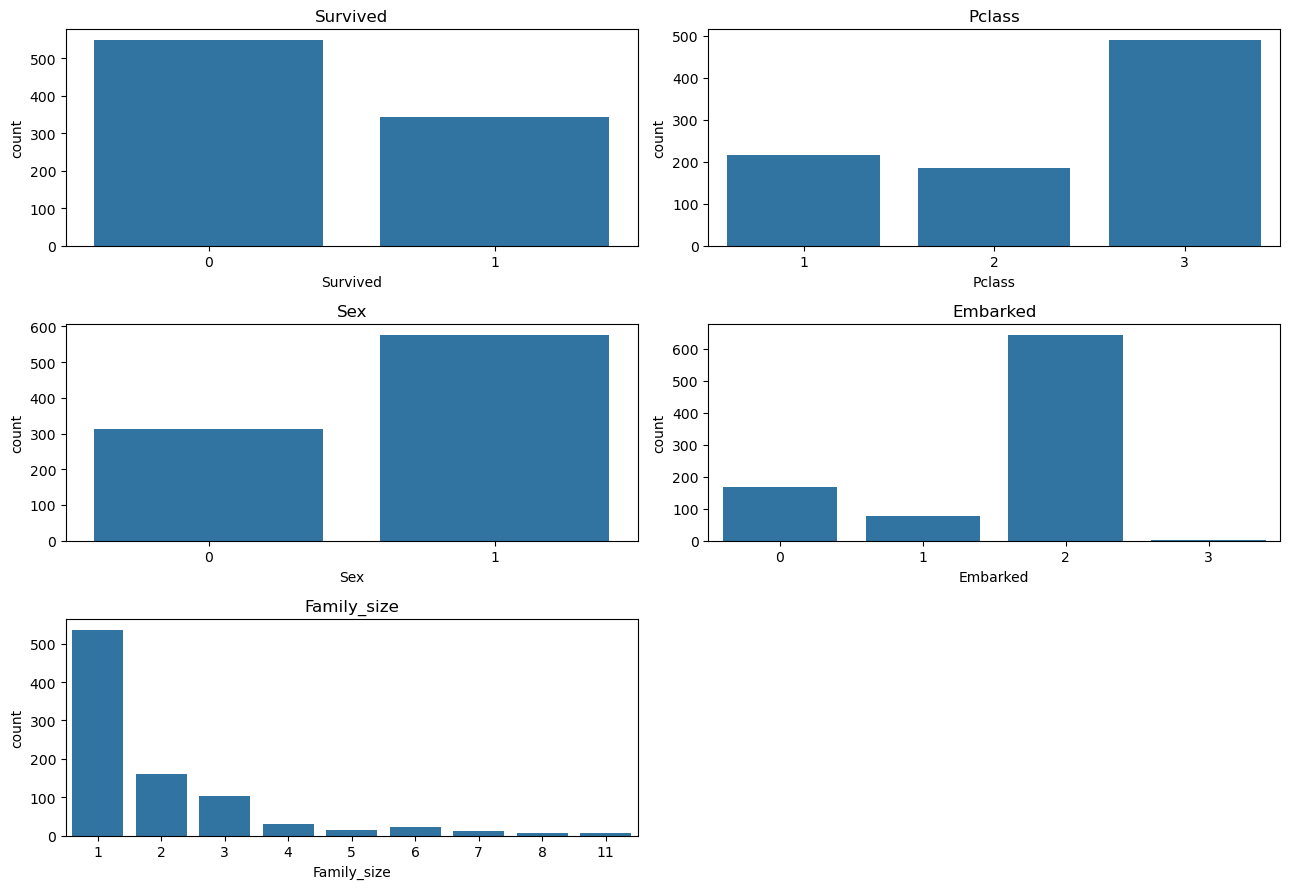

In [18]:
cat = data1[["Survived","Pclass","Sex","Embarked","Family_size"]]
plt.figure(figsize=(13,9))
for i,j in enumerate(cat.columns,1):
    plt.subplot(3,2,i)
    sns.barplot(cat[j].value_counts())
    plt.title(j)

plt.tight_layout()
plt.show()

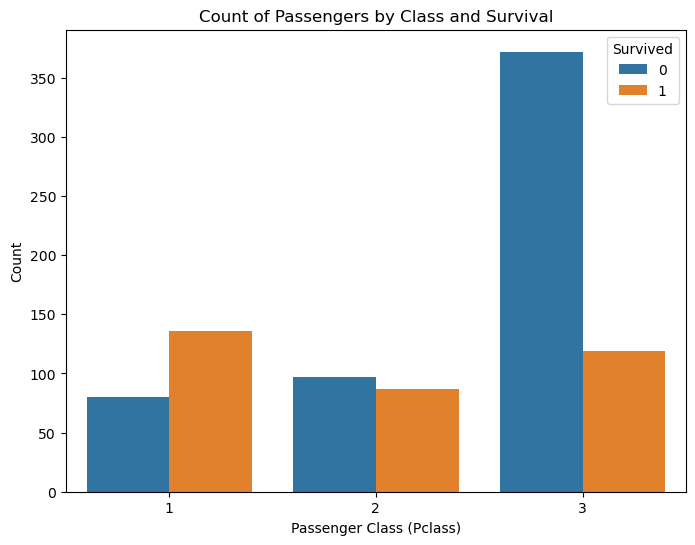

In [19]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Pclass', hue='Survived', data=data1)

plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.title('Count of Passengers by Class and Survival')


plt.show()

In [20]:
X,Y = data1.drop(columns="Survived"),data1.Survived

X.corrwith(Y).sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.163517
Age           -0.069809
Family_size    0.016639
Fare           0.257305
dtype: float64

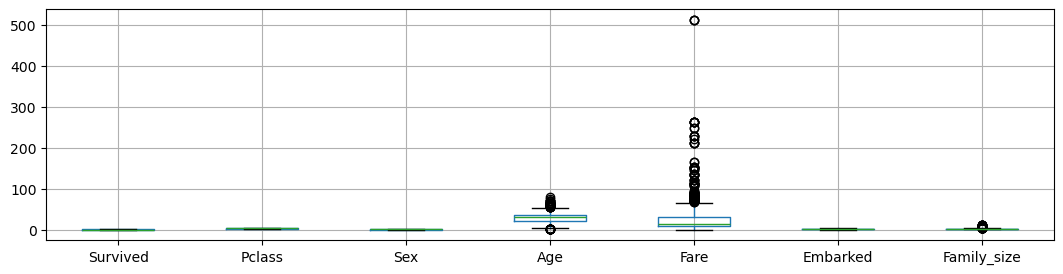

In [21]:
plt.figure(figsize=(13,3))
data1.boxplot()
plt.show()

## Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score 

## Logistic Regression

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=45)


In [25]:
log = LogisticRegression()
log.fit(x_train,y_train)

pred = log.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8435754189944135

In [26]:
from sklearn.model_selection import GridSearchCV

param = {"C":[0.01,0.1,1,10,100],"penalty":["l1","l2","elasticnet","None"],
        "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        "max_iter":[100,200,300,400]}

grid = GridSearchCV(log,param_grid=param , cv=5,scoring='accuracy',verbose=1)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [29]:
log = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'lbfgs')


log.fit(x_train,y_train)

pred = log.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8435754189944135

## Decision Tree

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.770949720670391

In [31]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
dtc = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 min_samples_leaf = 1,
 min_samples_split= 2)

dtc.fit(x_train,y_train)

pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8491620111731844

In [ ]:
# help(DecisionTreeClassifier)

## Random forest

In [35]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8268156424581006

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                              cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search_rf.fit(x_train, y_train)

grid_search_rf.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [41]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=5,min_samples_leaf=1,bootstrap=True)
rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8770949720670391